**Task_1 : Data Analysis Project Using Python**

**Objective:
Analyze a dataset of student exam scores and answer specific questions, presenting findings using python libraries and techniques for data analysis**


import the necessary library

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**DATA LOADING**

In [13]:
data =pd.read_csv("student-mat.csv",sep=';')
df= pd.DataFrame(data)
print("The First five data")
print(df.head(5))
print("The Last five data")
print(df.tail(5))

FileNotFoundError: [Errno 2] No such file or directory: 'student-mat.csv'

**DATA EXPLORATION**

In [4]:
df.describe()

NameError: name 'df' is not defined

In [9]:
df.isnull()
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [10]:
df.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [11]:
df.shape

(395, 33)

In [12]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

**DATA CLEANING**

In [14]:
df.duplicated().sum()

0

In [15]:
df=df.drop_duplicates()
df.shape

(395, 33)

In [16]:
df.dropna()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


**DATA ANALYSIS QUESTION**

In [18]:
# 1) what is the average score in math(G3) ?
average_g3=df['G3'].mean()
print("Average final math grade(G3):",average_g3)

Average final math grade(G3): 10.415189873417722


In [19]:
# 2) How many students scored above 15 in their final score (G3)?
above_15=(df["G3"]>15).sum()
print("The Total number of student who score above 15 : ",above_15)

The Total number of student who score above 15 :  40


In [20]:
# 3) Is there a correlation between study time(studytime) and the final grade(G3) ?
correlation=df["studytime"].corr(df["G3"])
print(" Correlation between studytime and the final grade", correlation)

 Correlation between studytime and the final grade 0.09781968965319633


In [21]:
# 4) Which gender has a higher average final grade(G3)?
avg_gender=df.groupby("sex")["G3"].mean()
higher_gender=avg_gender.idxmax()
print("gender with higher average final grade :", higher_gender)

gender with higher average final grade : M


**DATA VISUALIZATION**

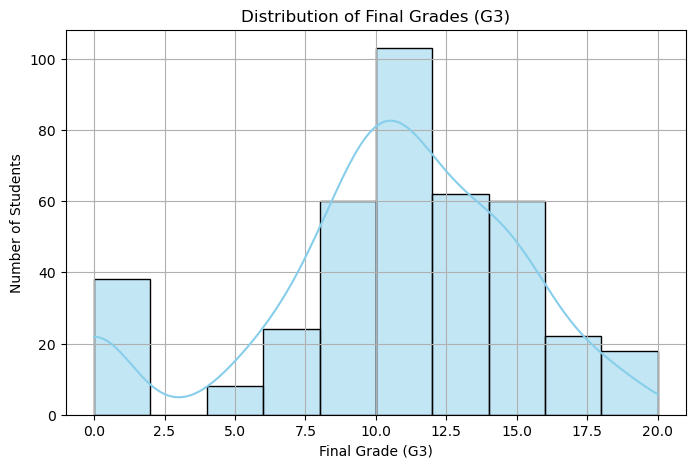

In [23]:
plt.figure(figsize=(8, 5))
sns.histplot(df['G3'], bins=10, kde=True, color='skyblue')
plt.title("Distribution of Final Grades (G3)")
plt.xlabel("Final Grade (G3)")
plt.ylabel("Number of Students")
plt.grid(True)
plt.show()

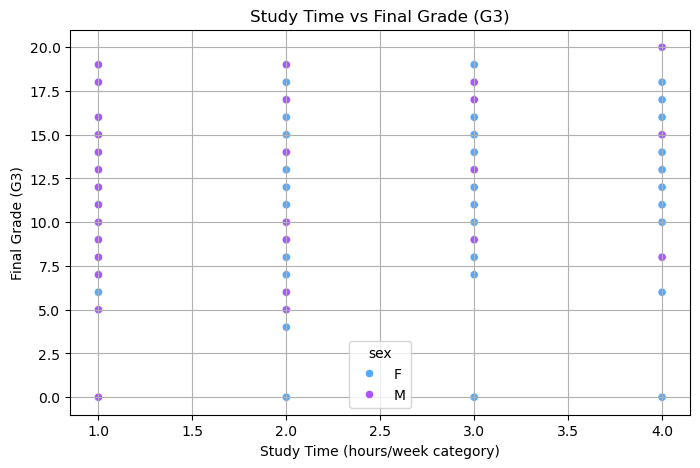

In [24]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='studytime', y='G3', hue='sex', palette='cool')
plt.title("Study Time vs Final Grade (G3)")
plt.xlabel("Study Time (hours/week category)")
plt.ylabel("Final Grade (G3)")
plt.grid(True)
plt.show()

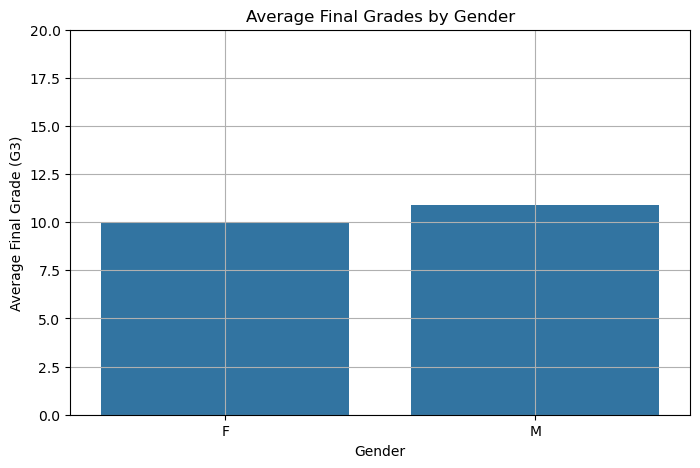

In [25]:
plt.figure(figsize=(8, 5))
avg_scores = df.groupby('sex')['G3'].mean().reset_index()
sns.barplot(data=avg_scores, x='sex', y='G3')
plt.title("Average Final Grades by Gender")
plt.xlabel("Gender")
plt.ylabel("Average Final Grade (G3)")
plt.ylim(0, 20)
plt.grid(True)
plt.show()